## Preprocessing

In [1]:
pip install tensorflow

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN","NAME"],axis=1,inplace=True)


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df["APPLICATION_TYPE"].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
counts_bin = application_df['CLASSIFICATION'].value_counts()
counts_bin

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count = counts_bin[counts_bin >1]
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list (counts_bin[counts_bin<100].index)
classifications_to_replace
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns=['IS_SUCCESSFUL'])


In [12]:
#Review the y variable Series
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [13]:
#Review the X variable Dataframe
X

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split the preprocessed data into a training an(d testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                 random_state=1,
                                                 stratify=y)
X_train.shape

(25724, 49)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

Attempt # 1
layer 1 units = 12 , activation = relu
layer 2 units = 25 , activation = relu
layer 3 units = 1 , activation = sigmoid

In [18]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=12,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=25,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                600       
                                                                 
 dense_7 (Dense)             (None, 25)                325       
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5823 - accuracy: 0.7066
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7287
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7293
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7311
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7311
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5489 - accuracy: 0.7317
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7317
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7318
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7318
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7320

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5563 - accuracy: 0.7255 - 500ms/epoch - 2ms/step
Loss: 0.5562664270401001, Accuracy: 0.7254810333251953


<Axes: >

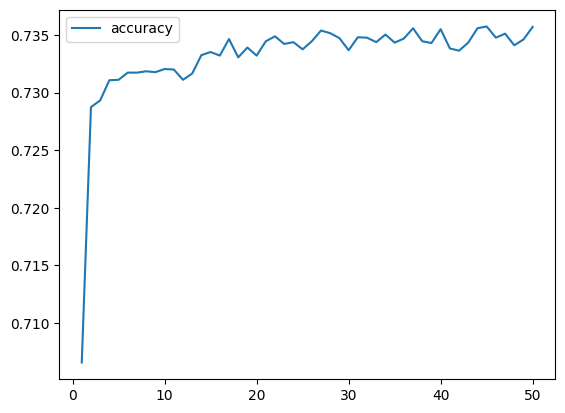

In [22]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

Attempt # 2
Layer 1 units =10 , activation = relu
Layer 2 units =15 , activation = sigmoid
layer 3 units =1 , activation = tanh

In [23]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=10,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=15,activation="sigmoid"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
#Check the structure of the model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                500       
                                                                 
 dense_10 (Dense)            (None, 15)                165       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7356
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7359
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5415 - accuracy: 0.7342
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7358
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5468 - accuracy: 0.7354
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7350
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5418 - accuracy: 0.7357
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5541 - accuracy: 0.7264 - 482ms/epoch - 2ms/step
Loss: 0.5540713667869568, Accuracy: 0.7264139652252197


<Axes: >

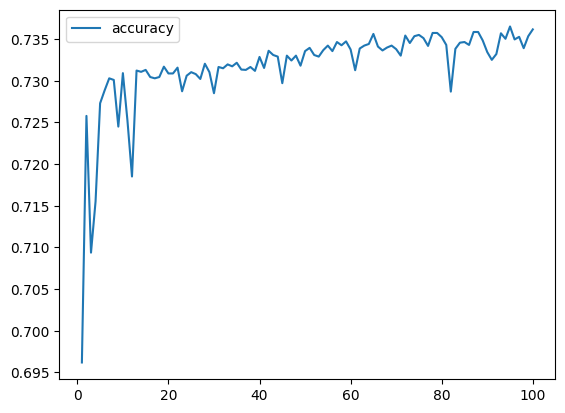

In [27]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

Attempt # 3
layer1 unit =15 ,activation = relu
layer2 unit =30 ,activation = relu
layer 3 unit =1 , activation = tanh

In [30]:
#Define the deep learning model
number_input_features =len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
#First hidden layer
nn_model.add(tf.keras.layers.Dense(units=15,activation="relu",input_dim=number_input_features))
#Second Hidden layer
nn_model.add(tf.keras.layers.Dense(units=30,activation="relu"))
#Output layer
nn_model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
#Check the structure of the model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                750       
                                                                 
 dense_13 (Dense)            (None, 30)                480       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.6200 - accuracy: 0.6981
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5817 - accuracy: 0.7250
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5776 - accuracy: 0.7281
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5883 - accuracy: 0.7158
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.7227
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5618 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5610 - accuracy: 0.7287
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5581 - accuracy: 0.7294
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7312
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5620 - accura

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5643 - accuracy: 0.7282 - 483ms/epoch - 2ms/step
Loss: 0.5642660856246948, Accuracy: 0.7281632423400879


<Axes: >

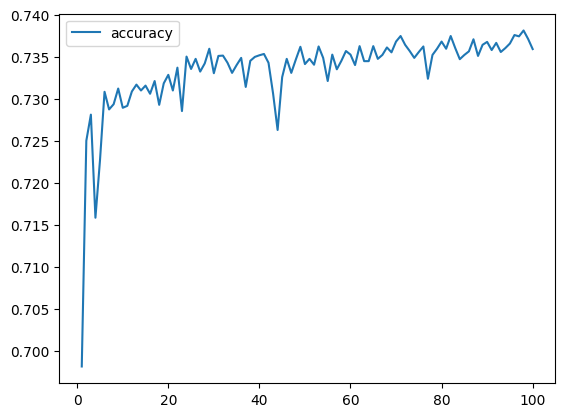

In [34]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [35]:
# Export our model to HDF5 file
from google.colab import files
nn_model.save('/content/AlphabetSoupCharity_Optimization.h5')
files.download('/content/AlphabetSoupCharity_Optimization.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>